In [1]:
import numpy as np
from scipy.stats import qmc

from paref.black_box_functions.design_space.bounds import Bounds
from paref.express.info import Info
from paref.interfaces.moo_algorithms.blackbox_function import BlackboxFunction


class ZDT1(BlackboxFunction):
    def __call__(self, x: np.ndarray) -> np.ndarray:
        n = len(x)
        f1 = x[0]
        g = 1 + 9 / (n - 1) * np.sum(x[1:])
        h = 1 - np.sqrt(f1 / g)
        f2 = g * h
        y = np.array([f1, f2])
        return y

    @property
    def dimension_design_space(self) -> int:
        return 2

    @property
    def dimension_target_space(self) -> int:
        return 2

    @property
    def design_space(self) -> Bounds:
        return Bounds(upper_bounds=np.ones(self.dimension_design_space),
                      lower_bounds=np.zeros(self.dimension_design_space))

In [2]:
#bbf = ZDT1()

In [3]:
import numpy as np
from paref.black_box_functions.design_space.bounds import Bounds
from paref.interfaces.moo_algorithms.blackbox_function import BlackboxFunction


class ZDT2(BlackboxFunction):
    def __call__(self, x: np.ndarray) -> np.ndarray:
        n = len(x)
        f1 = x[0]
        g = 1 + 9 / (n - 1) * np.sum(x[1:])
        h = 1 - (f1 / g) ** 2
        f2 = g * h
        y = np.array([f1, f2])
        self._evaluations.append([x, y])  # store evaluation
        return y

    @property
    def dimension_design_space(self) -> int:
        return 2

    @property
    def dimension_target_space(self) -> int:
        return 2

    @property
    def design_space(self) -> Bounds:
        return Bounds(upper_bounds=np.ones(self.dimension_design_space),
                      lower_bounds=np.zeros(self.dimension_design_space))

In [4]:
bbf = ZDT1() #  2 concave, 1 convex

In [5]:
[bbf(x) for x in qmc.scale(qmc.LatinHypercube(d=bbf.dimension_design_space).random(n=40), bbf.design_space.lower_bounds,
                           bbf.design_space.upper_bounds)]  # add samples according to latin hypercube scheme

[array([0.43159473, 3.72408402]),
 array([0.66829567, 5.17645034]),
 array([0.78109692, 0.21195142]),
 array([0.84029411, 3.60674737]),
 array([0.02618158, 1.83908399]),
 array([0.49721049, 2.3491548 ]),
 array([0.69517104, 5.46192529]),
 array([0.24087919, 4.34046546]),
 array([0.28828091, 4.31415714]),
 array([0.89562931, 5.59083892]),
 array([0.19030242, 7.66175449]),
 array([0.53962253, 5.68788933]),
 array([0.1487981, 1.9760448]),
 array([0.20112115, 2.22674288]),
 array([0.36502814, 4.53869709]),
 array([0.8535686 , 1.52450968]),
 array([0.82385497, 6.06586694]),
 array([0.61588865, 4.39177731]),
 array([0.33596838, 2.34411796]),
 array([0.77477475, 2.57073761]),
 array([0.17257998, 1.73020542]),
 array([0.11411341, 7.54538489]),
 array([0.99075195, 5.17759627]),
 array([0.94094424, 2.86285799]),
 array([0.08557347, 4.15827567]),
 array([0.4723495 , 0.67683984]),
 array([0.62633394, 6.74394274]),
 array([0.73655415, 2.38061623]),
 array([0.56982639, 2.64976518]),
 array([0.051470

Obtaining optimal number of training iterations...


100%|██████████| 1000/1000 [00:01<00:00, 851.96it/s]


Optimal Training iterations: 1000


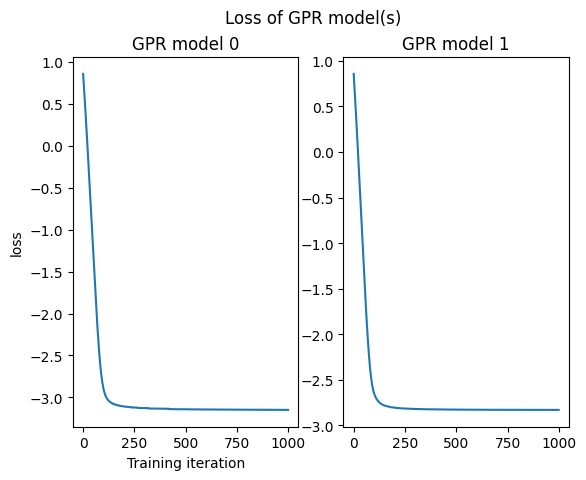


----------------------
Training...


100%|██████████| 1000/1000 [00:01<00:00, 803.65it/s]



Starting Optimization...

 Found Pareto point: 
 x=[4.56751712e-06 1.22527188e-05] 
 prediction=[7.76442043e-04 9.76278621e-01] 
 standard deviation=[0.01179994 0.12001186]

Evaluating blackbox function...
Value of blackbox function:  [4.56751712e-06 9.97972982e-01]
Difference to estimation:  [ 0.00077187 -0.02169436] 


----------------------
Training...


100%|██████████| 1000/1000 [00:01<00:00, 866.06it/s]



Starting Optimization...

 Found Pareto point: 
 x=[6.57130847e-06 1.97473291e-05] 
 prediction=[4.93261824e-04 9.89147640e-01] 
 standard deviation=[0.01153192 0.09607917]

Evaluating blackbox function...
Value of blackbox function:  [6.57130847e-06 9.97614042e-01]
Difference to estimation:  [ 0.00048669 -0.0084664 ] 

Convergence reached. The 2-distance of the last two points found is 0.0003589453720140051.

----------------------
Training...


100%|██████████| 1000/1000 [00:01<00:00, 875.84it/s]



Starting Optimization...

 Found Pareto point: 
 x=[9.99797647e-01 2.76197092e-06] 
 prediction=[0.99910336 0.0141038 ] 
 standard deviation=[0.01224069 0.11811553]

Evaluating blackbox function...
Value of blackbox function:  [9.99797647e-01 1.13611813e-04]
Difference to estimation:  [-0.00069428  0.01399018] 


----------------------
Training...


100%|██████████| 1000/1000 [00:01<00:00, 844.27it/s]



Starting Optimization...

 Found Pareto point: 
 x=[9.99769119e-01 1.40392351e-05] 
 prediction=[0.99934302 0.00875383] 
 standard deviation=[0.01104886 0.09835996]

Evaluating blackbox function...
Value of blackbox function:  [9.99769119e-01 1.78632804e-04]
Difference to estimation:  [-0.0004261   0.00857519] 

Convergence reached. The 2-distance of the last two points found is 7.100389785450447e-05.
End of sequence reached. Algorithm stopped.
Access the best fitting Pareto points by calling the attributes 'minima_components' and 'max_point'.


In [6]:
from paref.express.express_search import ExpressSearch

moo = ExpressSearch(bbf)

moo.minimal_search(max_evaluations=5)

In [7]:
moo._one_points

array([[4.56751712e-06, 9.97972982e-01],
       [9.99797647e-01, 1.13611813e-04]])

Lets collect a bit of information about our Pareto front before making a decision which Pareto point to look for. 
This significantly reduces the time and computational effort to obtain good results. 

In [8]:
info = Info(bbf,training_iter=1000)

Obtaining information about the approximate Pareto front...


100%|██████████| 1000/1000 [00:01<00:00, 870.60it/s]


Starting minimization...
finished!
Value of blackbox:  [0.0012889  1.10321777]
Starting minimization...
finished!
Value of blackbox:  [ 0.87124893 -0.00397666]
Starting minimization...
finished!
Value of blackbox:  [0.3680114 0.3344515]
Starting minimization...
finished!
Value of blackbox:  [0.36701979 0.33563897]
Done! You can access the following information about your Pareto front:
        * model fitness: how well the model approximates the bbf, how to improve it and how certain its estimation is (Info.model_fitness)
        * topology: the shape of your Pareto front (Info.topology)
        * suggestion_pareto_points: suggestions for Pareto points to evaluate, how and why (Info.suggestion_pareto_points)
        * minima: the estimated minima of each component (Info.minima)
        


In [9]:
info.edge_points

array([[ 0.0012889 ,  1.10321777],
       [ 0.87124893, -0.00397666]])

In [10]:
info.maximal_pareto_point

array([0.3680114, 0.3344515])

In [11]:
info.topology

(Almost) Global optimum    Shape      Dimension Pareto front
-------------------------  -------  ------------------------
False                      Convex                          1


In [12]:
info.minima

  Component      Minimum        Std
-----------  -----------  ---------
          0   0.0012889   0.0148946
          1  -0.00397666  0.121291


[0.3197669  0.24999876] [-2.77338696 -2.57291746] [-2.90703368 -2.6707983 ] [0.85452062 0.85292947] [-2.90703368 -2.6707983 ]
The model has not converged. I suggest you increase the number of training iterations.
The uncertainty of your model seems to be high. Accordingly, you might need more evaluations to obtain good results. I suggest you allow each algorithm the maximal number of evaluations by using the max_iterations stopping criterion.
  Component    Average uncertainty (%) at 1000 training iterations
-----------  -----------------------------------------------------
          0                                               11.0929
          1                                                8.60837


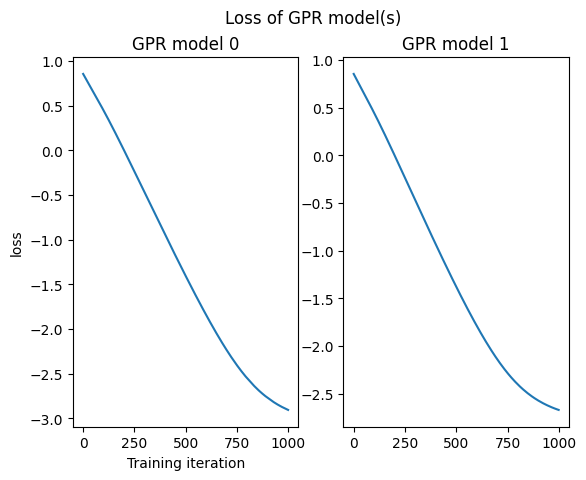

In [13]:
info.model_fitness

In [14]:
info.suggestion_pareto_points


            Your objectives appear to be conflicting, so there are real trade-offs. 
            As your Pareto front appears to be convex, you may be able to achieve improvements in all 
            components while suffering a smaller loss in others. 
            A Pareto point that represents a real trade-off in all components I've found is  
            
Target values                               Std                                            Dominates x% of evaluations
------------------------------------------  -------------------------------------------  -----------------------------
[0.36801140378273617, 0.33445149780635874]  [0.014472591528493171, 0.12276962821368846]                        54.5455

            You can get the corresponding design by using ...
            


In [15]:
# express search THEN use update

In [16]:
info._minima_pareto_points

array([[ 0.0012889 ,  1.10321777],
       [ 0.87124893, -0.00397666]])

In [17]:
info._surrogate.x

array([[3.66377282e-06, 1.28849535e-02],
       [8.71309606e-01, 6.66143893e-06],
       [3.68251355e-01, 1.38430355e-06],
       [3.67271573e-01, 8.52558710e-06]])

---

In [18]:
import scipy as sp

In [19]:
span = np.array([[1, 0, 0], [1, 1, 0], [2, 1, 0]])

In [20]:
sp.linalg.orth(span.T).T

array([[ 0.8816746 ,  0.47185793,  0.        ],
       [-0.47185793,  0.8816746 ,  0.        ]])

In [21]:
sp.linalg.orth((info.edge_points - info.edge_points[0]).T).T

array([[-0.61783101,  0.7863109 ]])

In [22]:
info.edge_points - info.edge_points[0]

array([[ 0.        ,  0.        ],
       [ 0.86996003, -1.10719442]])

In [23]:
basis = sp.linalg.orth((info.edge_points - info.edge_points[0]).T).T
projected_point = np.sum(np.array([np.dot(info.maximal_pareto_point - info.edge_points[0], basis_vector) * basis_vector
                                   for basis_vector in basis]), axis=0)
min_edges = np.min(info.edge_points, axis=0) - info.edge_points[0]
concave_degree = np.linalg.norm(info.maximal_pareto_point - info.edge_points[0] - min_edges)/np.linalg.norm(projected_point- min_edges) 

if concave_degree<0.5:
    concave_degree_description = "Strongly convex"

elif concave_degree<0.9:
    concave_degree_description = "Convex"
    
elif concave_degree<1.1:
    concave_degree_description = "Linear"
    
elif concave_degree<1.3:
    concave_degree_description = "Concave"
    
else:
    concave_degree_description = "Strongly convex"

In [24]:
concave_degree

0.7282801302847405

In [25]:
concave_degree_description

'Convex'

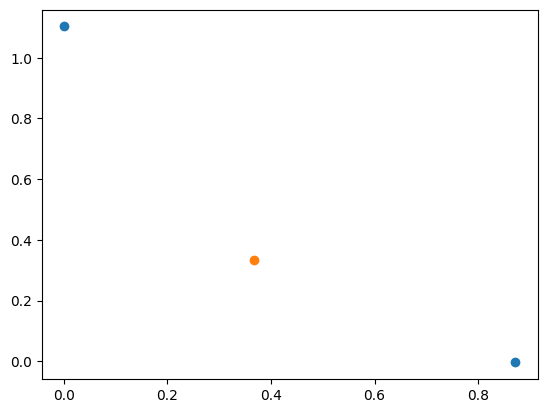

In [26]:
import matplotlib.pyplot as plt

plt.scatter(info.edge_points[:, 0], info.edge_points[:, 1])
plt.scatter(info.maximal_pareto_point[0], info.maximal_pareto_point[1])


(-2.0, 2.0)

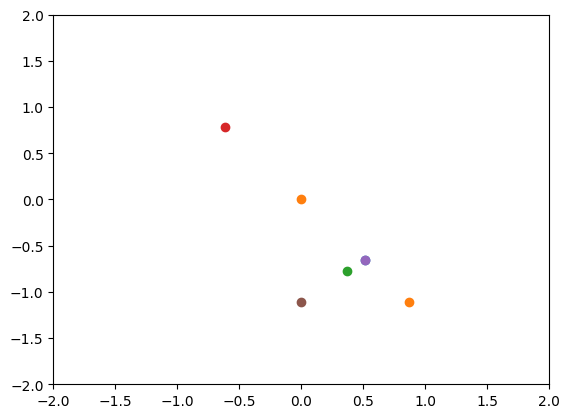

In [27]:
plt.scatter(projected_point[0], projected_point[1])
x = info.edge_points[0]
plt.scatter(info.edge_points[:, 0] - x[0], info.edge_points[:, 1] - x[1])
plt.scatter((info.maximal_pareto_point - info.edge_points[0])[0], (info.maximal_pareto_point - info.edge_points[0])[1])
plt.scatter(basis[:, 0], basis[:, 1])
plt.scatter(projected_point[0], projected_point[1])
plt.scatter(min_edges[0], min_edges[1])
plt.xlim([-2, 2])
plt.ylim([-2, 2])